In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Data_Preprocessing/Dropletdata_for_datapreprocessing_exercise.csv' , encoding='ISO-8859-1')
df.head()

,Mean droplet size (µm2),Droplet count,Process interval,Category
0,34.597073,1394,0,U
1,37.834522,1294,0,U
2,37.423876,1338,0,U
3,36.133785,1374,0,U
4,31.652493,1566,0,U


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean droplet size (µm2),150.0,16.439957,10.472195,6.631277,9.682469,10.852975,25.610785,39.231232
Droplet count,150.0,3809.126667,1672.896561,1294.000000,1865.750000,4199.000000,4615.250000,6657.000000
Process interval,150.0,35.000000,21.674839,0.000000,15.000000,35.000000,55.000000,70.000000


In [4]:
df.shape

(150, 4)

In [5]:
df.dtypes

Mean droplet size (µm2)    float64
Droplet count                int64
Process interval             int64
Category                    object
dtype: object

In [6]:
# defining Z score function 
def z_score(X):
    z = (X- np.mean(X))/np.std(X)
    return z

Z_scaled = z_score(df['Mean droplet size (µm2)'])


In [9]:
# defining minmaxscaler function
def min_max_scaler(X):
    min_max_scaled = (X- np.min(X))/(np.max(X)-np.min(X))
    return min_max_scaled

Min_max_scaled_data = min_max_scaler(df['Mean droplet size (µm2)'])

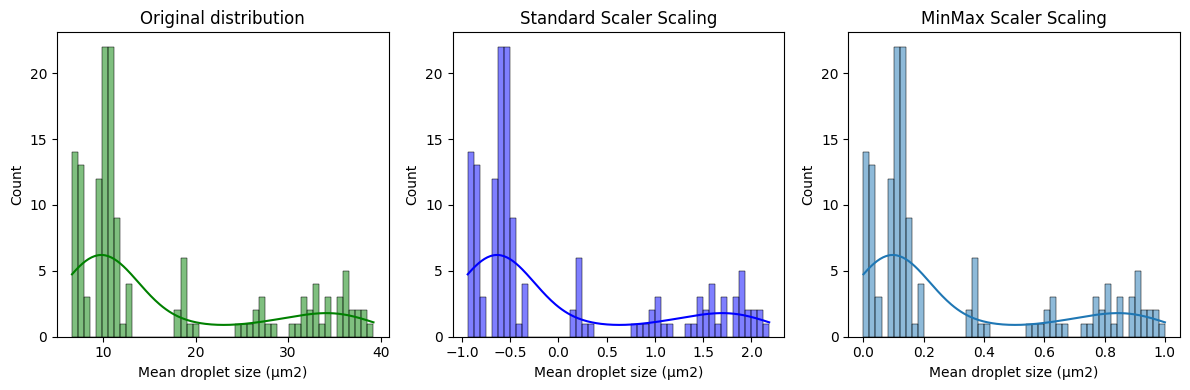

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 

# Plot 1: Original distribution
sns.histplot(df['Mean droplet size (µm2)'], bins=50, color='green', ax=ax[0],kde = True) 
ax[0].set_title('Original distribution')

# Plot 2: Standard Scaler Scaling
sns.histplot(Z_scaled, bins=50, color='blue',kde = True, ax=ax[1]) 
ax[1].set_title('Standard Scaler Scaling')

# Plot 3: MinMax Scaler Scaling
sns.histplot(Min_max_scaled_data, bins=50,kde = True, ax=ax[2]) 
ax[2].set_title('MinMax Scaler Scaling')

plt.tight_layout()  
plt.show()


- The **original data** for the Mean droplet size ranges from 6.63 to 39.3.
- After applying **StandardScaler (Z-score scaling)**, the mean droplet size is transformed to a range of approximately -1 to 2. Generally, Z-scores has mean of 0 and std deviation of 1 and the data generally lies in between range of [-3,3].
- Following **Min-Max scaling**, the mean droplet size is rescaled to fall between 0 and 1.